In [1]:
# import the pandas library
None
# import the seaborn library
None
# import train_test_split function
from sklearn.model_selection import train_test_split

## Practising Feature Selection Techniques

### Import the Dataset

The dataset is available from [here](https://www.cs.ucy.ac.cy/courses/DSC510/data/lab5-dataset.csv).

In [2]:
# read the dataset
df = None
# print the 5 first lines of the dataset
None

,Country,Age,Salary,Subscribed,Purchased
0,France,44.0,72000.0,Yes,No
1,India,35.0,58000.0,No,Yes
2,Greece,28.0,27000.0,Yes,No
3,Spain,27.0,48000.0,Yes,Yes
4,Germany,30.0,54000.0,Yes,No


In [3]:
# separate features (all columns except Purchased) and target variable (Purchased)
X = None
y = None

In [4]:
# Split dataset into training (80%), validation (10%) and testing (10%) - use random_state=42
X_train, X_2, y_train, y_2 = None
X_val, X_test, y_val, y_test = None

### Handling missing (NA) values 

In [5]:
# print the number of missing data points per column of the training dataset
missing_values_count = None
print(missing_values_count)

Country       0
Age           1
Salary        2
Subscribed    0
dtype: int64


In [6]:
# Fill the missing values using the mean value of each column
# Hint: use the Sklearn’s simple imputer with the mean strategy
from sklearn.impute import SimpleImputer
import numpy as np
# create the imputer object
my_imputer = None
# fit/transform imputer on the Age and Salary columns using the training dataset
X_train[['Age', 'Salary']] = None
# transform validation and testing datasets
X_val[['Age', 'Salary']] = None
X_test[['Age', 'Salary']] = None
# print missing values of the training dataset to conform if missing values were imputed
missing_values_count = X_train.isnull().sum()
print(missing_values_count)

Country       0
Age           0
Salary        0
Subscribed    0
dtype: int64


### Encoding Categorical data

Categorical data is data which has some categories such as, in our dataset; there are two categorical features, Country, and Subscribed.

Since machine learning model completely works on mathematics and numbers, but if our dataset would have a categorical variable, then it may create trouble while building the model. So it is necessary to encode these categorical variables into numbers.

For the "Country" feature we can use One-Hot Encoding and for the "Subscribed" feature we can use Label Encoding. Label Encoding is used because the purchased variable has only two categories yes or no, and which are automatically encoded into 1 and 2. One-Hot Encoding is better suited for the "Country" feature since values are not nominal and the number of distinct values is relatively small.

In [7]:
import category_encoders as ce

# perform Label encoding using the OrdinalEncoder on the Subscribed column
ordinal_encoder = ce.OrdinalEncoder(return_df=True, mapping=[{'col':'Subscribed','mapping':{'No':1,'Yes':2}}])
X_train = None
X_val = None
X_test = None

# perform One Hot encoding on the Country column
onehot_encoder = None
# apply on the dataframe
X_train = None
X_val = None
X_test = None
# print the training dataframe
X_train

,Country_Germany,Country_France,Country_Greece,Country_India,Country_Spain,Age,Salary,Subscribed
11,1.0,0.0,0.0,0.0,0.0,50.000000,83000.000000,2
14,0.0,1.0,0.0,0.0,0.0,39.000000,44000.000000,1
8,0.0,1.0,0.0,0.0,0.0,35.000000,58000.000000,2
13,0.0,0.0,1.0,0.0,0.0,54.000000,99090.909091,2
2,0.0,0.0,1.0,0.0,0.0,28.000000,27000.000000,2
9,0.0,0.0,0.0,1.0,0.0,39.666667,62000.000000,1
16,0.0,0.0,0.0,1.0,0.0,38.000000,480000.000000,1
4,1.0,0.0,0.0,0.0,0.0,30.000000,54000.000000,2
7,1.0,0.0,0.0,0.0,0.0,40.000000,99090.909091,2
10,0.0,1.0,0.0,0.0,0.0,48.000000,79000.000000,2


### Feature Scaling

Feature scaling is a technique to standardize the independent variables of the dataset in a specific range. In feature scaling, we put our variables in the same range and in the same scale so that no any variable dominate the other variable.

As we can see, the age and salary column values are not on the same scale. If we do not scale these variables, a machine learning model based on Euclidean distance will not perform well.

Here, we will consider normalization using the Standard Scaler.

In [8]:
# import the standard scaler
from sklearn.preprocessing import StandardScaler

# create a standardizer object
scaler = None
# fit/transform the training dataset  (give only Age and Salart columns as input)
X_train[['Age', 'Salary']] = None
# transform the validation/tetsing datasets
X_val[['Age', 'Salary']] = None
X_test[['Age', 'Salary']] = None
# print the testing dataframe
X_test

,Country_Germany,Country_France,Country_Greece,Country_India,Country_Spain,Age,Salary,Subscribed
1,0.0,0.0,0.0,1.0,0.0,-0.557569,-0.367137,1
15,0.0,0.0,0.0,0.0,1.0,0.000000,-0.420745,2


### Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model.

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

In order to find the importance of each feature, we will train an Ensemble classifier which assign scores to input features as part of its training phase.

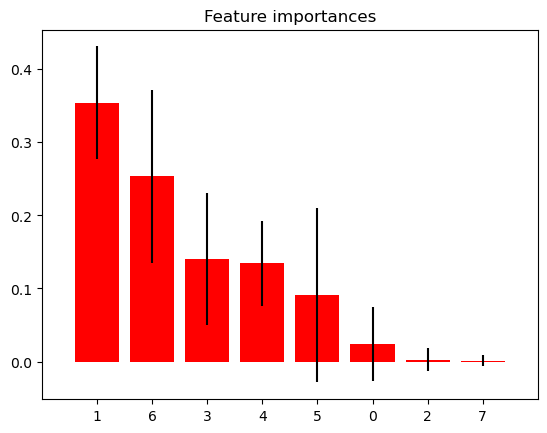

In [9]:
# Import the Extra Tree Classifier which is an ensemble classfier
None
import matplotlib.pyplot as plt

# use 100 estimators (trees), set max_features to 7 and random_state to 42
estimator = None
# get the feature importances (features with high importance score higher)
importances = None

# Plot the feature importances of the forest (do not change anything below)
std = np.std([tree.feature_importances_ for tree in estimator.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Practising Feature Extraction (Dimensionality Reduction) Techniques

In this section, we try 3 dimensionality reduction techniques to reduce the number of features from a high dimensional dataset.

Below is the sample 'Wine' dataset, which we will be using to demonstrate all the 3 dimensionality reduction techniques (PCA, SVD and LDA). This dataset contains the following columns:

* Wine
* Alcohol
* Malic_acid
* Ash
* Acl (Ash_Alcanity)
* Mg (Magnesium)
* Phenols
* Flavanoids
* Nonflavanoid_Phenols
* Proanth (Proanthocyanins)
* Color_intensity
* Hue
* OD
* Proline

These columns (except the first one) explain the properties of each wine also called as the independent variables (also called as the input features). The column named Wine is the dependent variable, the target variable (what we want to predict) as it explains the category of the wine. Each wine belongs to one of three classes: namely 1, 2 or 3.

The dataset is available from [here](https://www.cs.ucy.ac.cy/courses/DSC510/data/wine.csv).

### Import the wine dataset

In [10]:
# read the dataset wine.csv
df2 = None
# print the 5 first lines of the dataset
None

,Wine,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_intensity,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
# print some basic statistics so as observe the different ranges in std values
None

,Wine,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_intensity,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
# separate features from target variable. The target variable is the Wine column.
X = None
y = None

In [13]:
# Split dataset into training (80%), validation (10%) and testing (10%) - use random_state=42
X_train, X_2, y_train, y_2 = train_test_split(X, y, train_size=0.80, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, train_size=0.50, random_state=42)

### Feature scaling

In [14]:
# Transform all features to the same scale
# Use Robust scaler to scale all input features - there is no need to scale the target variable
from sklearn.preprocessing import RobustScaler

rscaler = None

# fit/transform training dataset
X_train_scaled = None
# transform validation/testing datasets
X_val_scaled = None
X_test_scaled = None
X_test_scaled

array([[ 0.64684015,  0.00986842,  0.6969697 , -0.97674419,  0.16      ,
         0.8744186 ,  0.86462882, -0.85      ,  0.20209059,  0.28596038,
        -0.25185185,  0.5891182 ,  1.01104009],
       [-0.17843866,  1.02302632, -1.15151515, -0.74418605, -0.96      ,
        -0.63255814, -0.48034934,  0.45      , -1.01045296, -0.41343669,
        -0.78518519, -0.49155722, -0.66937827],
       [-0.43866171, -0.17434211, -0.51515152,  0.76744186,  0.53333333,
        -0.28837209,  0.00873362,  0.        ,  0.07665505, -0.87510767,
         0.28148148,  0.13883677, -0.73213248],
       [ 0.75092937, -0.12828947, -0.45454545, -0.74418605, -0.10666667,
         0.31627907,  0.14847162, -0.4       ,  0.59233449,  0.03445306,
         0.22222222,  0.61163227,  0.87158629],
       [-1.18959108, -0.74671053,  0.42424242,  0.41860465, -0.53333333,
         0.15813953, -0.03784571,  0.4       , -0.16027875, -0.52368648,
         0.4       , -0.34896811, -0.525276  ],
       [-0.47583643, -0.161184

### Dimensionality Reduction Techniques

TruncatedSVD explained variance ratio (first first  6 components components): [0.31574399 0.20061056 0.1371916  0.08124658 0.07099925 0.05371095]
Total variance explained by created features: 85.95029348479763 %


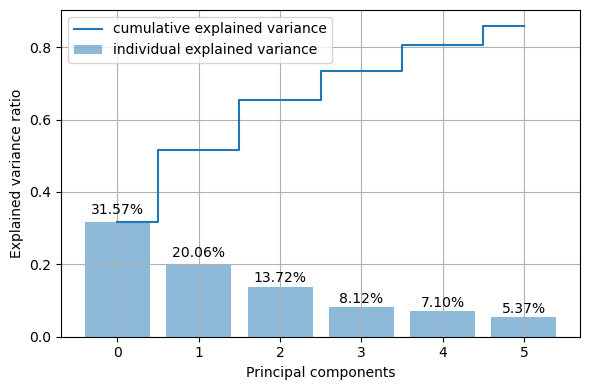

PCA explained variance ratio (first first  6 components components): [0.31661791 0.2015462  0.1371968  0.08227032 0.07139436 0.05400057]
Total variance explained by created features: 86.30261472525869 %


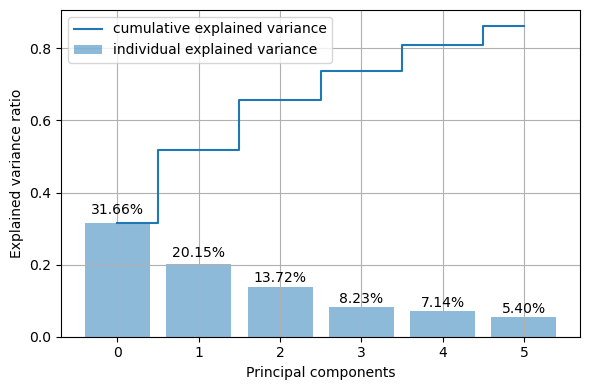

LDA explained variance ratio (first  2 components): [0.71429654 0.28570346]
Total variance explained by created features: 100.0 %


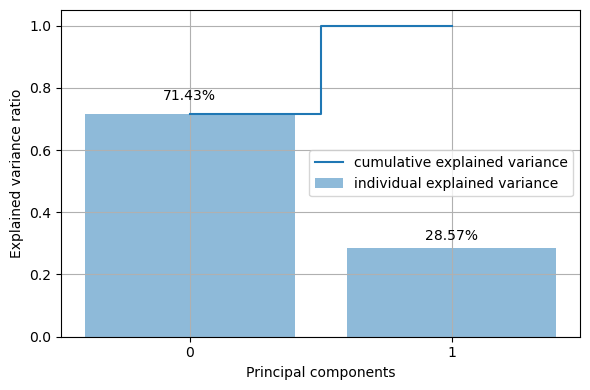

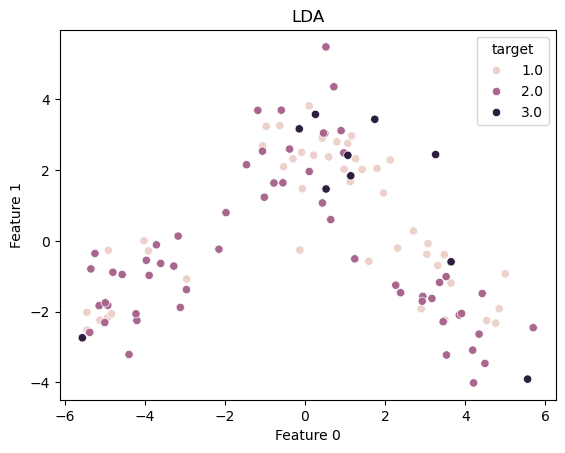

In [15]:
# Truncated SVD
from sklearn.decomposition import TruncatedSVD
# PCA
from sklearn.decomposition import PCA
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# function that plots the variance explained by each new feature
def print_variance_explained_plot(obj, n_components):
    cum_var_exp = np.cumsum(obj.explained_variance_ratio_)
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(range(n_components), obj.explained_variance_ratio_, alpha=0.5, align='center',
                label='individual explained variance')
    # show percentage of explained variance on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.05*height, '%.2f%%' % (height*100), 
                ha='center', va='bottom')
    plt.step(range(n_components), cum_var_exp, where='mid',
                 label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.xticks( range(n_components) )
    plt.grid(True)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

def print_2d_scatter_plot(features, target, title):
    newDf=pd.DataFrame(features, columns=['Feature '+str(i) for i in range(features.shape[1])])
    newDf['target']=target
    sns.scatterplot(data=newDf, x='Feature 0', y='Feature 1', hue='target').set(title=title)

# number of components (new features) to be extracted by SVD and PCA. Set to 6.
num_of_components = 6

# create the TruncatedSVD object with n_components equal to the num_of_components variable above
tsvd = None
# train tsvd object and transform X_train_scaled to create the new dataset based on the newly created features
wine_tsvd = tsvd.fit_transform(X_train_scaled)
# Percentage of variance explained for each components
print('TruncatedSVD explained variance ratio (first first ',num_of_components, 'components components): %s'
      % str(tsvd.explained_variance_ratio_))
print('Total variance explained by created features:', sum(tsvd.explained_variance_ratio_)*100, '%')
# print explained variance plot
print_variance_explained_plot(tsvd,num_of_components)

# create the PCA object with n_components equal to the num_of_components variable above
pca = None
# train pca object and transform X_train_scaled to create the new dataset based on the newly created features
wine_pca = pca.fit_transform(X_train_scaled)
print('PCA explained variance ratio (first first ',num_of_components, 'components components): %s'
      % str(pca.explained_variance_ratio_))
print('Total variance explained by created features:', sum(pca.explained_variance_ratio_)*100, '%')
# print explained variance plot
print_variance_explained_plot(pca,num_of_components)

# create the LinearDiscriminantAnalysis object with n_components equal to 2 (you cannot set it more than 2 since all wine classes are 3)
lda = None
# train lda object and transform X_train_scaled to create the new dataset based on the newly created features
wine_lda = lda.fit(X_train_scaled, y_train).transform(X_train_scaled)
# Percentage of variance explained for each components
print('LDA explained variance ratio (first ',2, 'components): %s'
      % str(lda.explained_variance_ratio_))
print('Total variance explained by created features:', sum(lda.explained_variance_ratio_)*100, '%')
# print explained variance plot
print_variance_explained_plot(lda,2)
# print the scatterplot with the transformed dataset
print_2d_scatter_plot(wine_lda, y_train, 'LDA')

# Important note:
# Some of you, while implementing the last part of Lab5 (to create the scatter plot with the two features extracted by the LDA algorithm) 
# you may come across a "strange" observation: The dots on the scatter plot may be reversed along the x-axis (Feature 0) as compared to the 
# expected scatterplot (provided below).
# This is not considered to be an error that you need to resolve. The new feature (i.e. the evaluated eigenvector that is the new generated 
# dimension) returned when the LDA is executed on your pc can be a reversed (a multiplied by -1) version of the eigenvector (dimension) that 
# was returned when the LDA was executed on my pc. Both generated eigenvectors/dimensions/features are "optimal".